In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
import h5py

In [26]:
h5 = h5py.File('/data/readout/archive/2015-11-14-timeseries-for-brad.h5','w')

In [2]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [3]:
pkls = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-09-29_141610_long_timestream.pkl')

In [4]:
pkl= pkls[0]

In [5]:
pkl.timestream_duration

2147.4836479999999

The normalized timeseries has had the cable delay and arbitrary gain and phase removed

In [6]:
ts = pkl.normalized_timeseries[:]

In [27]:
ds = h5.create_dataset('normalized_timeseries',shape=ts.shape,dtype=ts.dtype,data=ts)

In [7]:
import kid_readout.analysis.resonator

Next, we convert the normalized timeseries to fractional frequency fluctuation (detuning) using the model fit to the resonance sweep

In [8]:
x = kid_readout.analysis.resonator.normalized_s21_to_detuning(ts,pkl.resonator_model)

In [28]:
ds = h5.create_dataset('fractional_fluctuation',shape=x.shape,dtype=x.dtype,data=x)

In [9]:
import kid_readout.utils.despike

Next we despike the data

In [10]:
xds = kid_readout.utils.despike.deglitch_window(x,2**12)

/home/gjones/kid_readout/kid_readout/utils/fftfilt.py:72: ComplexWarning: Casting complex values to real discards the imaginary part
  y[i:k] = y[i:k] + yt[:k-i]            # and add


In [29]:
ds = h5.create_dataset('despiked_fractional_fluctuation',shape=xds.shape,dtype=xds.dtype,data=xds)

In [30]:
h5.close()

In the following, I discard the first 2**20 samples because of some transient behavior (temperature stabilization?)

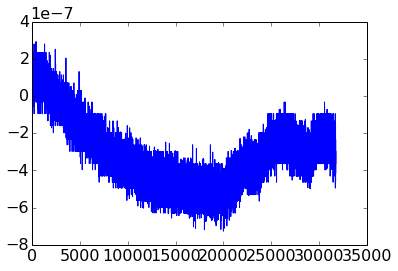

In [12]:
plot(xds[2**20::1024])

Remove any mean and compute the power spectrum

In [13]:
pxx,fr = mlab.psd(xds[2**20:]-xds[2**20:].mean(),NFFT=2**20,Fs=256e6/2**14)

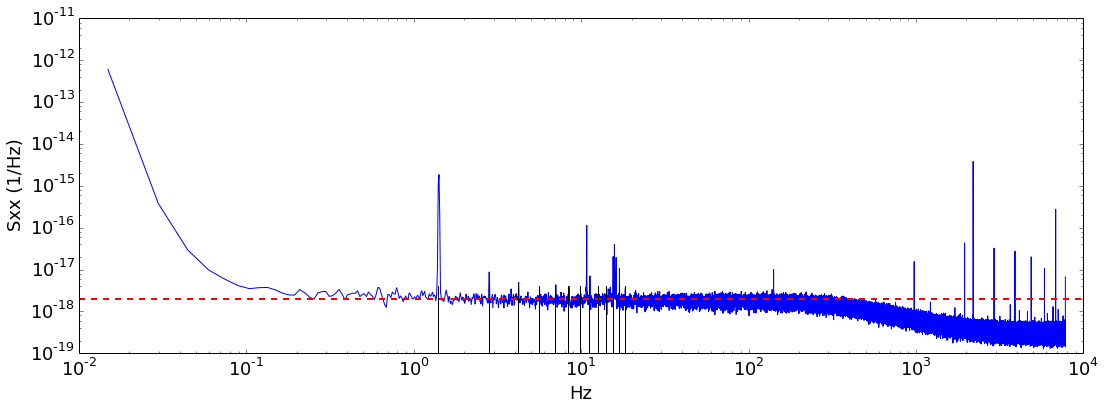

In [15]:
rcParams['font.size']=18
figure(figsize=(18,6))
loglog(fr,pxx)
gca().axhline(2e-18,color='r',linestyle='--',lw=2) # straight line to guide the eye
for k in range(14):
    gca().axvline(k*1.4,ymax=0.2,color='k')  # first few pulse tube harmonics
ylabel('Sxx (1/Hz)')
xlabel('Hz')


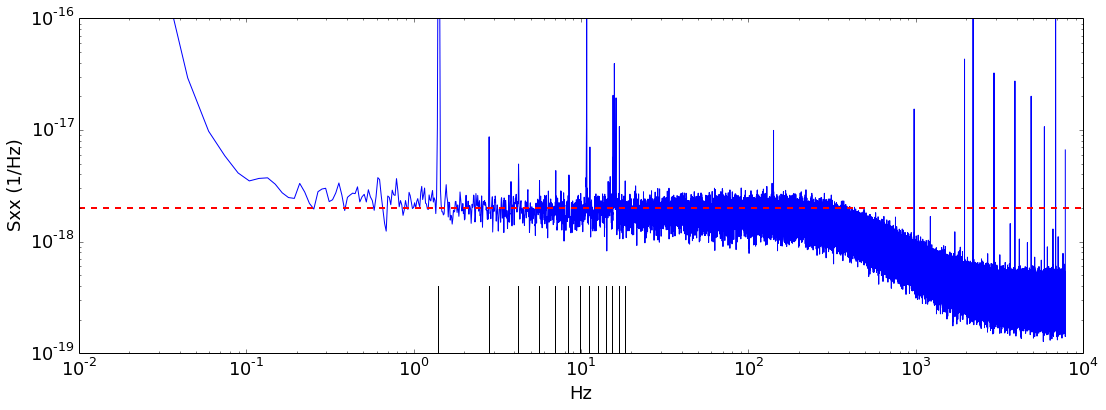

In [16]:
figure(figsize=(18,6))
loglog(fr,pxx)
ylim(1e-19,1e-16)
gca().axhline(2e-18,color='r',linestyle='--',lw=2)
for k in range(14):
    gca().axvline(k*1.4,ymax=0.2,color='k')
ylabel('Sxx (1/Hz)')
xlabel('Hz')
